In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_excel("mf_final_return_file.xlsx")
df.head()

,Unnamed: 0,Scheme_Code,Scheme_Name,Net_Asset_Value,Date,3M_OLD_Price,3M_per_chng,6M_OLD_Price,6M_per_chng,1Y_OLD_Price,1Y_per_chng,3Y_OLD_Price,3Y_per_chng,5Y_OLD_price,5Y_per_chng
0,4524866,147713,ITI Overnight Fund - Direct Plan - Growth Option,1154.6646,2023-06-03,1142.3492,4.382544,1130.2575,4.365488,1107.6991,4.239915,1053.8871,3.090961,1007.8409,2.757321
1,4540358,147157,ITI Liquid Fund - Direct Plan - Growth Option,1191.0773,2023-06-03,1177.4934,4.694982,1164.2144,4.668009,1139.9343,4.486487,1083.3712,3.209788,1036.2941,2.823264
2,5360592,147515,LIC MF Overnight Fund-Direct Plan-Growth,1175.3579,2023-06-03,1162.3610,4.548162,1149.6691,4.518831,1126.2599,4.359385,1070.0409,3.178668,1022.3679,2.828283
3,5372016,120249,LIC MF Liquid Fund-Direct Plan-Growth,4137.9286,2023-06-03,4088.4269,4.931776,4039.2650,4.944889,3951.9968,4.704756,3749.4127,3.341140,3544.6794,3.143344
4,5512755,147564,Mahindra Manulife Overnight Fund - Direct Plan...,1173.7682,2023-06-03,1160.7827,4.550388,1148.0728,4.526359,1124.6816,4.364489,1068.4130,3.184483,1020.8190,2.831630


In [3]:
df.columns

Index(['Unnamed: 0', 'Scheme_Code', 'Scheme_Name', 'Net_Asset_Value', 'Date',
       '3M_OLD_Price', '3M_per_chng', '6M_OLD_Price', '6M_per_chng',
       '1Y_OLD_Price', '1Y_per_chng', '3Y_OLD_Price', '3Y_per_chng',
       '5Y_OLD_price', '5Y_per_chng'],
      dtype='object')

In [4]:
mf_df = df[['Scheme_Code','Scheme_Name','Net_Asset_Value','Date','3M_per_chng','6M_per_chng','1Y_per_chng','3Y_per_chng','5Y_per_chng']]
mf_df.head(2)

,Scheme_Code,Scheme_Name,Net_Asset_Value,Date,3M_per_chng,6M_per_chng,1Y_per_chng,3Y_per_chng,5Y_per_chng
0,147713,ITI Overnight Fund - Direct Plan - Growth Option,1154.6646,2023-06-03,4.382544,4.365488,4.239915,3.090961,2.757321
1,147157,ITI Liquid Fund - Direct Plan - Growth Option,1191.0773,2023-06-03,4.694982,4.668009,4.486487,3.209788,2.823264


In [15]:
df['3m'] = df['3M_per_chng'].rank(method= "dense", ascending= False)
df['6m'] = df['6M_per_chng'].rank(method= "dense", ascending= False)
df['1y'] = df['1Y_per_chng'].rank(method= "dense", ascending= False)
df['3y'] = df['3Y_per_chng'].rank(method= "dense", ascending= False)
df['5y'] = df['5Y_per_chng'].rank(method= "dense", ascending= False)
df['Total'] = df['3m'] + df['6m'] + df['1y'] + df['3y'] + df['5y']
df.sort_values('Total')

,Unnamed: 0,Scheme_Code,Scheme_Name,Net_Asset_Value,Date,3M_OLD_Price,3M_per_chng,6M_OLD_Price,6M_per_chng,1Y_OLD_Price,...,3Y_OLD_Price,3Y_per_chng,5Y_OLD_price,5Y_per_chng,3m,6m,1y,3y,5y,Total
5,5523022,139538,Mahindra Manulife Liquid Fund - Direct Plan -G...,1482.7835,2023-06-03,1464.9173,4.968393,1447.2120,4.976280,1415.6002,...,1341.7488,3.387693,1268.7675,3.166605,2.0,3.0,2.0,2.0,2.0,11.0
16,7977951,119303,Union Liquid Fund - Direct Plan - Growth Option,2196.4938,2023-06-03,2169.8650,4.999944,2143.6518,4.990856,2096.7341,...,1988.7383,3.367524,1880.4345,3.155967,1.0,2.0,1.0,4.0,3.0,11.0
18,8170282,120304,UTI- Liquid Cash Plan - Direct Plan - Growth ...,3734.9828,2023-06-03,3690.1138,4.953128,3644.9480,5.001267,3565.8462,...,3381.6497,3.368131,3202.1874,3.126047,3.0,1.0,3.0,3.0,7.0,17.0
7,6086318,118701,Nippon India Liquid Fund - Direct Plan Growth ...,5574.7806,2023-06-03,5507.9841,4.939843,5441.1006,4.974073,5322.8417,...,5049.2184,3.355726,4777.1312,3.136437,4.0,4.0,4.0,5.0,5.0,22.0
3,5372016,120249,LIC MF Liquid Fund-Direct Plan-Growth,4137.9286,2023-06-03,4088.4269,4.931776,4039.2650,4.944889,3951.9968,...,3749.4127,3.341140,3544.6794,3.143344,5.0,6.0,6.0,6.0,4.0,27.0
14,7664691,119861,Tata Liquid Fund- Direct Plan-Growth Option,3595.0403,2023-06-03,3552.0819,4.926013,3509.8444,4.913602,3433.9919,...,3258.4093,3.331494,3081.4862,3.130876,6.0,7.0,7.0,7.0,6.0,33.0
6,6063309,145810,Nippon India Overnight Fund - Direct Plan - Gr...,121.7473,2023-06-03,120.3883,4.592424,119.0593,4.566369,116.6350,...,109.9358,3.460220,102.9044,3.420130,11.0,11.0,10.0,1.0,1.0,34.0
8,6783349,103734,Quantum Liquid Fund - Direct Plan Growth Option,30.6424,2023-06-03,30.2850,4.804709,29.9356,4.777883,29.3150,...,27.8738,3.206931,26.5659,2.896274,8.0,8.0,8.0,9.0,8.0,41.0
1,4540358,147157,ITI Liquid Fund - Direct Plan - Growth Option,1191.0773,2023-06-03,1177.4934,4.694982,1164.2144,4.668009,1139.9343,...,1083.3712,3.209788,1036.2941,2.823264,9.0,9.0,9.0,8.0,11.0,46.0
4,5512755,147564,Mahindra Manulife Overnight Fund - Direct Plan...,1173.7682,2023-06-03,1160.7827,4.550388,1148.0728,4.526359,1124.6816,...,1068.4130,3.184483,1020.8190,2.831630,15.0,13.0,11.0,10.0,9.0,58.0


In [8]:
df['Scheme_Name'].value_counts()

Scheme_Name
ITI Overnight Fund - Direct Plan - Growth Option                                                         1
Shriram Overnight Fund -  Direct Growth                                                                  1
UTI - Overnight Fund - Direct Plan - Growth Option                                                       1
Union Liquid Fund - Direct Plan - Growth Option                                                          1
Union Overnight Fund - Direct Plan - Growth Option                                                       1
Tata Liquid Fund- Direct Plan-Growth Option                                                              1
Tata Overnight Fund-Direct Plan-Growth                                                                   1
Sundaram Liquid Fund (Formerly Known as Principal Cash Management Fund) - Direct Plan - Growth Option    1
Sundaram Overnight Fund Direct Plan - Growth                                                             1
Samco Overnight Fund - Di

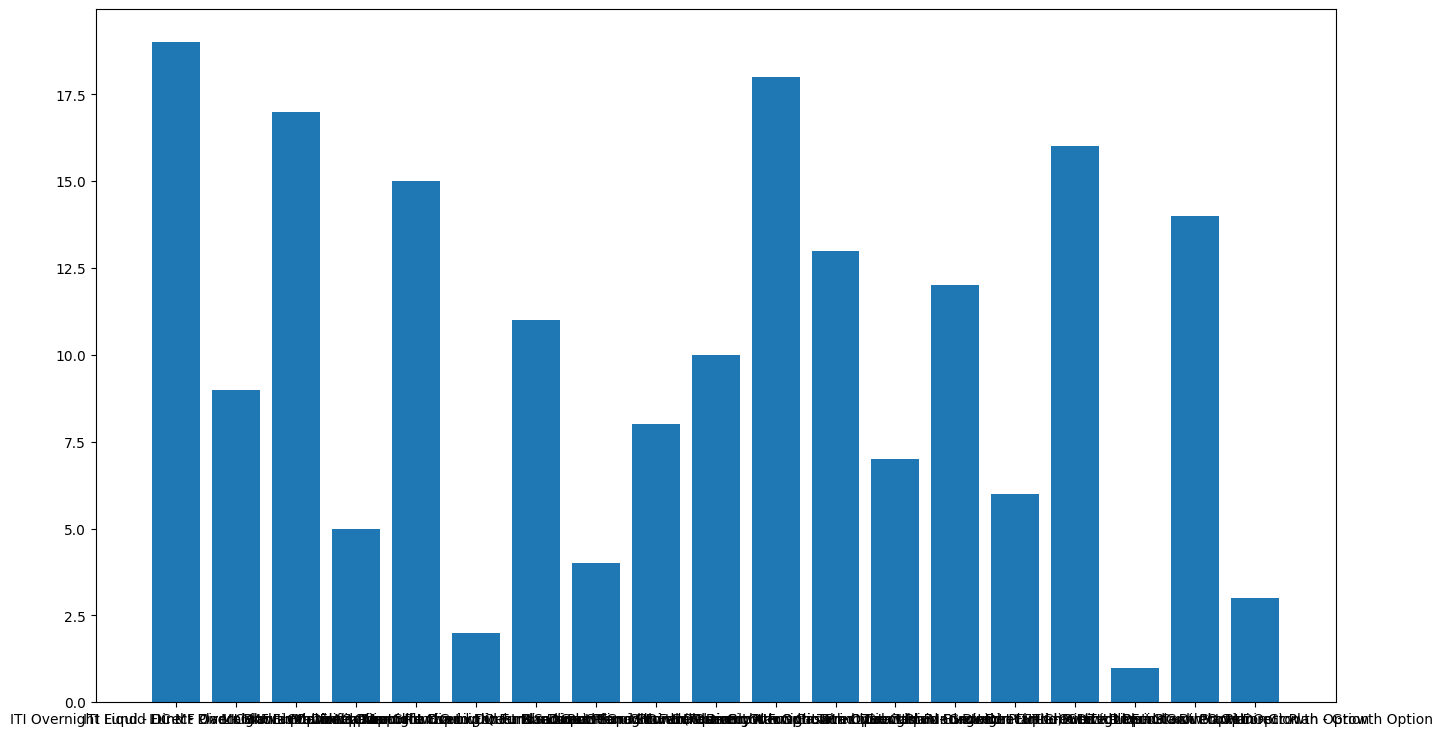

In [7]:
name = df['Scheme_Name']
price = df['3m']
 
# Figure Size
fig= plt.subplots(figsize =(16, 9))
 
plt.bar(name, price)
 
plt.show()

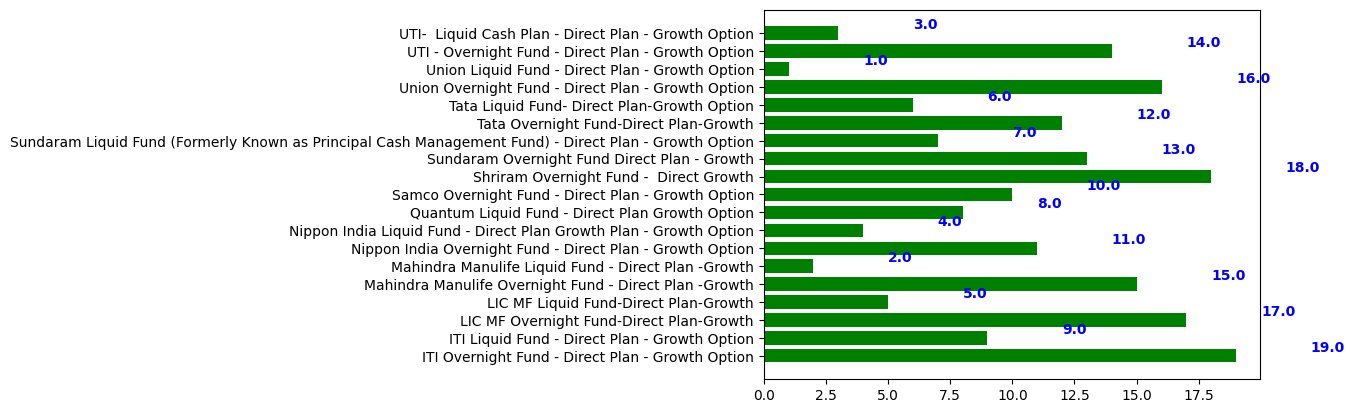

In [12]:
name = df['Scheme_Name']
price = df['3m']
fig, ax = plt.subplots()
width = 0.75
# ind = np.arange(len(name))
 
ax.barh(name, price, width, color = "green")
 
for i, v in enumerate(price):
    ax.text(v + 3, i + .25, str(v),
            color = 'blue', fontweight = 'bold')
plt.show()

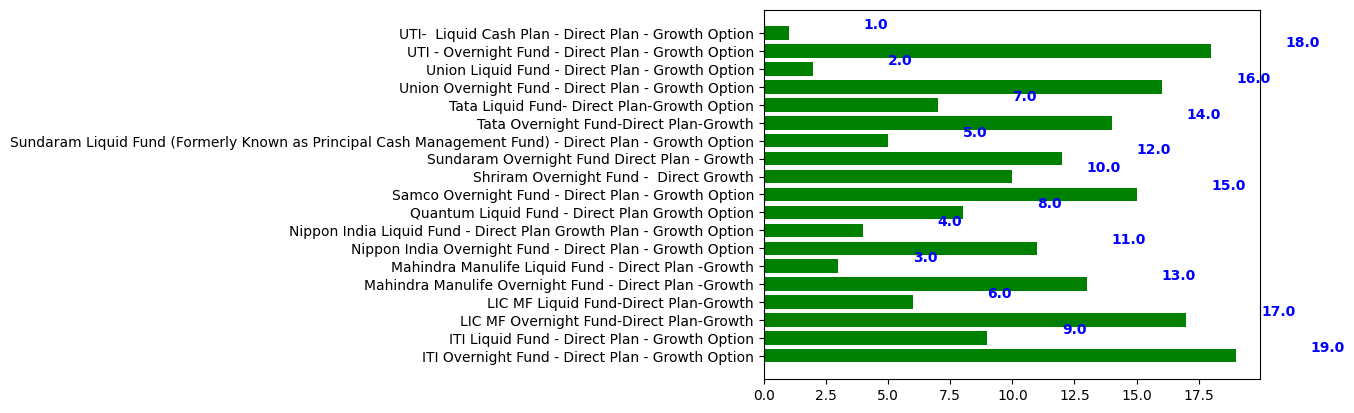

In [13]:
name = df['Scheme_Name']
price = df['6m']
fig, ax = plt.subplots()
width = 0.75
# ind = np.arange(len(name))
 
ax.barh(name, price, width, color = "green")
 
for i, v in enumerate(price):
    ax.text(v + 3, i + .25, str(v),
            color = 'blue', fontweight = 'bold')
plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


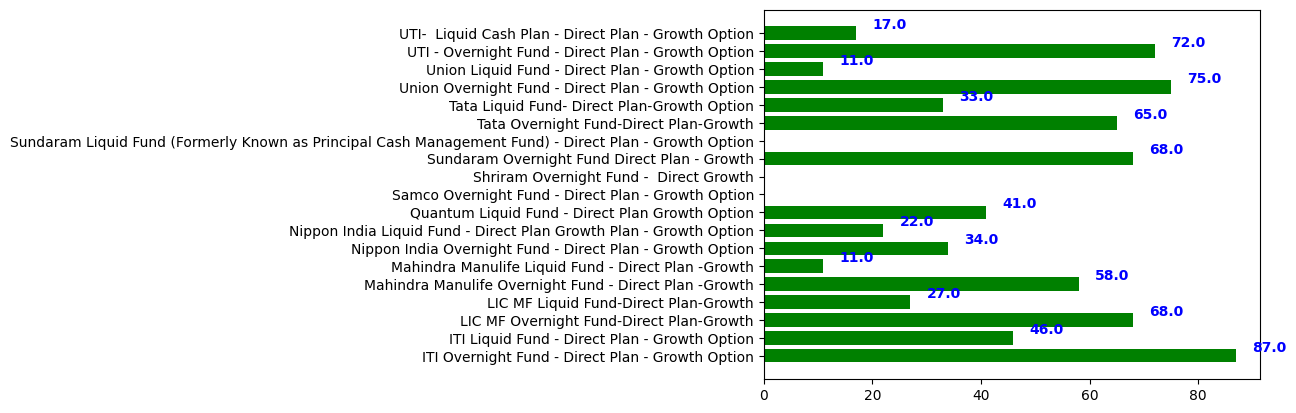

In [14]:
name = df['Scheme_Name']
price = df['Total']
fig, ax = plt.subplots()
width = 0.75
# ind = np.arange(len(name))
 
ax.barh(name, price, width, color = "green")
 
for i, v in enumerate(price):
    ax.text(v + 3, i + .25, str(v),
            color = 'blue', fontweight = 'bold')
plt.show()